In [1]:
# import sys
# !{sys.executable} -m pip install seaborn
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
import numpy as np
import pandas as pd
np.random.seed(42)  

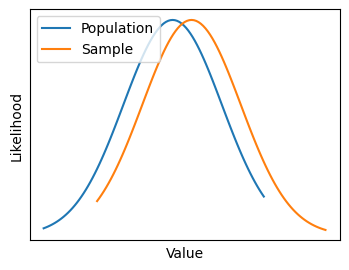

In [2]:
mu = 15
sig = 13
x1 = np.random.normal(mu,sig,100)
x1_eval = np.linspace(min(x1), max(x1), 100)
x1_pdf = norm.pdf(x1_eval, mu, sig)

mu2 = 20
sig2 = 13
x2 = np.random.normal(mu2,sig2,100)
x2_eval = np.linspace(min(x2), max(x2), 100)
x2_pdf = norm.pdf(x2_eval, mu2, sig2)

fig = plt.subplots(figsize = (4,3))
plt.plot(x1_eval,x1_pdf,label = 'Population')
plt.plot(x2_eval,x2_pdf,label = 'Sample')
plt.xticks([])
plt.yticks([])
plt.ylabel('Likelihood')
plt.xlabel('Value')
# plt.title('Population Distribution')
plt.legend(loc = 'upper left')
# plt.savefig('one.png')

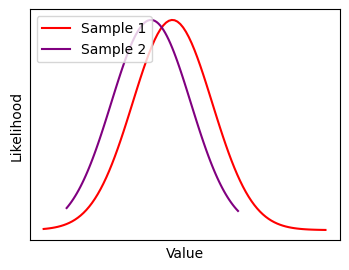

In [3]:
mu = 15
sig = 13
x1 = np.random.normal(mu,sig,100)
x1_eval = np.linspace(min(x1), max(x1), 100)
x1_pdf = norm.pdf(x1_eval, mu, sig)

mu2 = 8
sig2 = 13
x2 = np.random.normal(mu2,sig2,100)
x2_eval = np.linspace(min(x2), max(x2), 100)
x2_pdf = norm.pdf(x2_eval, mu2, sig2)

fig = plt.subplots(figsize = (4,3))
plt.plot(x1_eval,x1_pdf,label = 'Sample 1',c = 'r')
plt.plot(x2_eval,x2_pdf,label = 'Sample 2',c = 'purple')
plt.xticks([])
plt.yticks([])
plt.ylabel('Likelihood')
plt.xlabel('Value')
# plt.title('Population Distribution')
plt.legend(loc = 'upper left')
# plt.savefig('two.png')

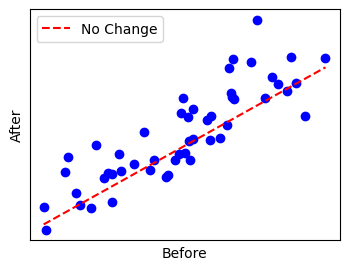

In [4]:
fig = plt.subplots(figsize = (4,3))

b = np.random.normal(loc=30, scale=5, size=50)
a = b + np.random.normal(loc=2, scale=3, size=50)


plt.scatter(b, a, color='blue')
plt.plot([min(b), max(b)], [min(b), max(b)],'r--', label='No Change')

plt.xlabel('Before')
plt.ylabel('After')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig('paired.png')

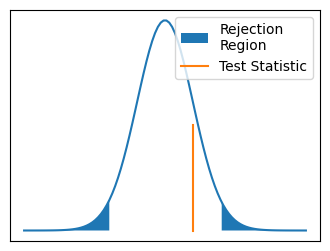

In [5]:
fig = plt.subplots(figsize = (4,3))

x = np.linspace(-5,5,100)
y = st.t.pdf(x,len(x) - 1,0,1)

t_crit = st.t.ppf(0.025, df = len(x) - 1)

plt.plot(x,y)




plt.xticks([])
plt.yticks([])
# plt.ylabel('Likelihood')
plt.fill_between(
    x = x,
    y1 = y,
    label = 'Rejection\nRegion'
)
plt.fill_between(
    x = x,
    y1 = y,
    where = (x<-t_crit)&(x>t_crit),
    color = 'white'
)
plt.plot(
    (1,1),
    (0,0.2),
    label = 'Test Statistic',
)

plt.legend()
# plt.xlabel('Value')
# plt.title('Two Tailed Test')
plt.savefig('twotail.png')

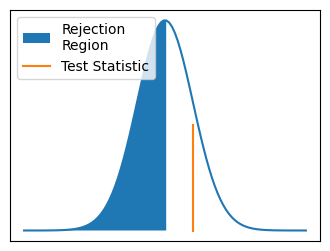

In [6]:
fig = plt.subplots(figsize = (4,3))

x = np.linspace(-5,5,100)
y = st.t.pdf(x,len(x) - 1,0,1)

t_crit = 0

plt.plot(x,y)




plt.xticks([])
plt.yticks([])
# plt.ylabel('Likelihood')
plt.fill_between(
    x = x,
    y1 = y,
    label = 'Rejection\nRegion'
)
plt.fill_between(
    x = x,
    y1 = y,
    where = (x>-t_crit),
    color = 'white'
)
plt.plot(
    (1,1),
    (0,0.2),
    label = 'Test Statistic',
)
# plt.xlabel('Value')
# plt.title('Right Tail Test')
plt.legend(loc = 'upper left')
plt.savefig('onetail1.png')

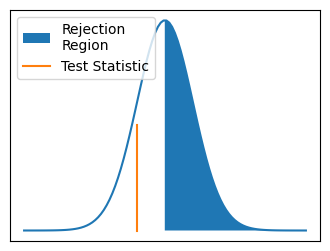

In [7]:
fig = plt.subplots(figsize = (4,3))

x = np.linspace(-5,5,100)
y = st.t.pdf(x,len(x) - 1,0,1)

t_crit = 0

plt.plot(x,y)




plt.xticks([])
plt.yticks([])
# plt.ylabel('Likelihood')
plt.fill_between(
    x = x,
    y1 = y,
    label = 'Rejection\nRegion'
)
plt.fill_between(
    x = x,
    y1 = y,
    where = (x<-t_crit),
    color = 'white'
)
plt.plot(
    (-1,-1),
    (0,0.2),
    label = 'Test Statistic',
)
# plt.xlabel('Value')
# plt.title('Right Tail Test')
plt.legend(loc = 'upper left')
plt.savefig('onetail2.png')

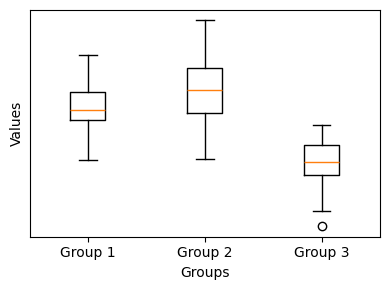

In [8]:
fig = plt.subplots(figsize = (4,3))

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data for three groups
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 12, 30)
group3 = np.random.normal(30, 8, 30)

plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.xlabel('Groups')
plt.ylabel('Values')
plt.yticks([])
plt.tight_layout()
plt.savefig('oneway.png')

In [9]:
# levels_factor1 = ['A', 'B', 'C']
# levels_factor2 = ['X', 'Y']

# data = pd.DataFrame(columns=['Factor1', 'Factor2', 'Values'])

# for level1 in levels_factor1:
#     for level2 in levels_factor2:
#         values = np.random.normal(loc=50, scale=10, size=20)
#         data = pd.concat(
#             [data,pd.DataFrame(
#                 {'Factor1': [level1] * 20,
#                  'Factor2': [level2] * 20, 
#                  'Values': values}
#             )])


plt.figure(figsize=(3, 3))
sns.lineplot(
    x='Factor1', 
    y='Values', 
    hue='Factor2', 
    data=data, 
    marker='o',
    errorbar = None)

# Add labels and title
plt.xlabel('Factor 1')
plt.ylabel('Values')
plt.yticks([])
plt.tight_layout()
plt.savefig('interaction.png')

NameError: name 'data' is not defined

<Figure size 300x300 with 0 Axes>